# Mapping the 7-mer production fitness landscape

# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

from scipy.stats import gaussian_kde, norm

from utils_f4f import heatmap, si_format

In [2]:
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['font.family'] = ['sans-serif']
mpl.rcParams['font.sans-serif'] = ['Arial']
mpl.rcParams['text.usetex'] = False
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

-------

# Codon usage does not affect production fitness 



In [3]:
# Data

# Load production fitness scores for the two codon replicates
df2a = pd.read_csv('data/modeling_library_production_fitness.csv')
df2a.set_index('AA', inplace=True)
#df2a = df2a.loc[df2a['Label'] == 'Designed']

In [5]:
# Preprocessing 

# Remove non-detected in DNA (NA)
df2a = df2a.loc[(~df2a['Production1'].isna()) & (~df2a['Production2'].isna()), :]

# log2 of the production (virus to DNA enrichment)
x = np.log2(df2a['Production1'])
y = np.log2(df2a['Production2'])

# Variants not detected in both codon replicates 
remove = np.isinf(x) & np.isinf(y)
x = x[~remove]
y = y[~remove]

# Variants detected in both codon replicates
keep = (~np.isinf(x)) & (~np.isinf(y))
x_both = x[keep]
y_both = y[keep]

# Orphan codon replicates (detected in one codon replicate but not the other)
y_missing = y[np.isinf(x)]
x_missing = x[np.isinf(y)]


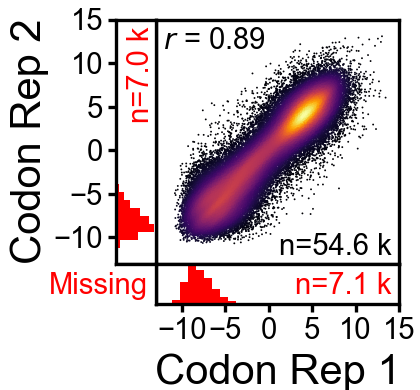

In [5]:
# Figure 

# Prepare plotting kernal 
kernel = gaussian_kde(np.vstack([
    x_both.sample(n=10000, random_state=1), 
    y_both.sample(n=10000, random_state=1)
]))
c_both = kernel(np.vstack([x_both.values, y_both.values]))

# Figure specifications 
fig = plt.figure(figsize=(1.4,1.3), dpi=150)

gs = fig.add_gridspec(2, 2, left=0.275, right=0.95, bottom=0.22, top=0.95, 
                      width_ratios=[1, 6], height_ratios=[6, 1], hspace=0., wspace=0)
ax = fig.add_subplot(gs[0, 1])
ax.scatter(x_both, y_both, c=c_both, cmap=mpl.cm.inferno, s=0.2, edgecolor='none', rasterized=True)
ax.set_xticks([]); ax.set_yticks([])
xlim = [-13, 9]
bins = np.linspace(*xlim, 25)
ax.set_xlim(xlim); ax.set_ylim(xlim)
ax.text(0.03, 0.97, r'$r$ = {:.2f}'.format(np.corrcoef(x_both, y_both)[0, 1]),
       transform=ax.transAxes, ha='left', va='top', fontsize=7)

ax.text(0.97, 0.01, 'n={}'.format(si_format(len(x_both)), precision=2, format_str='{value}{prefix}',), 
        transform=ax.transAxes, ha='right', va='bottom', fontsize=7)

# Left Marginal
ax = fig.add_subplot(gs[0, 0])
ax.hist(y_missing, bins=bins, edgecolor='none', orientation='horizontal', density=True, color='r')
ax.set_ylim(xlim)
ax.set_xticks([]); ax.set_yticks([-10, -5, 0, 5, 10, 15])
ax.text(0.97, 0.97, 'n={}'.format(si_format(len(y_missing)), precision=2, format_str='{value}{prefix}',), 
        transform=ax.transAxes, ha='right', va='top', fontsize=7, rotation=90, color='r')
ax.set_ylabel('Codon Rep 2', labelpad=1)
ax.tick_params(axis='both', labelsize=7, length=2, pad=1)

# Bottom Marginal
ax = fig.add_subplot(gs[1, 1])
ax.hist(x_missing, bins=bins, edgecolor='none', density=True, color='r')
ax.set_xlim(xlim)
ax.set_xticks([-10, -5, 0, 5, 10, 15]); ax.set_yticks([])
ax.text(0.97, 0.8, 'n={}'.format(si_format(len(x_missing)), precision=2, format_str='{value}{prefix}',), 
        transform=ax.transAxes, ha='right', va='top', fontsize=7, color='r')
ax.set_xlabel('Codon Rep 1', labelpad=2)
ax.tick_params(axis='both', labelsize=7, length=2, pad=1)

# Missing label (not detected in either)
ax = fig.add_subplot(gs[1, 0])
for spine in ['bottom', 'left']:
    ax.spines[spine].set_visible(False)
ax.set_xticks([]); ax.set_yticks([])

ax.text(0.8, 0.8, 'Missing', transform=ax.transAxes, color='r', ha='right', va='top', fontsize=7, clip_on=False)

# Save Figure and display 
filename = 'figures/fig2a_codon_usage'
fig.savefig('{}_600dpi.svg'.format(filename), dpi=600)
fig.savefig('{}_1200dpi.svg'.format(filename), dpi=1200)
fig.savefig('{}.png'.format(filename), dpi=300)

plt.close()

Image(filename+'.png') 

------



# The 7mer Production fitness landscape is bimodal



In [7]:
# Data

# Load production fitness scores for the modeling library variants 
df2b = pd.read_csv('data/modeling_library_production_fitness.csv')

In [9]:
df2b

,AA,CodonRep1,CodonRep2,Label,Production1,Production2,Production,log2Enr
0,AAACMFE,GCGGCCGCGTGTATGTTTGAA,GCTGCTGCTTGCATGTTCGAG,Designed,0.008439,0.005269,0.006854,-7.188785
1,AAAFQEE,GCGGCTGCTTTTCAGGAGGAA,GCAGCCGCCTTCCAAGAAGAG,Designed,1.619001,1.901295,1.760148,0.815697
2,AAAGCEN,GCGGCAGCGGGCTGTGAAAAC,GCAGCCGCCGGGTGCGAGAAT,Designed,0.034692,0.013044,0.023868,-5.388773
3,AAALKGI,GCGGCCGCATTAAAGGGAATA,GCCGCAGCGTTGAAAGGGATC,Designed,2.017490,0.698961,1.358226,0.441723
4,AAANGCQ,GCTGCCGCGAACGGGTGCCAG,GCAGCGGCCAATGGTTGTCAA,Calibration,0.025722,0.059570,0.042646,-4.551452
...,...,...,...,...,...,...,...,...
74459,YYYRMGV,TATTATTATCGTATGGGGGTA,TACTACTACCGGATGGGCGTG,Designed,0.002545,0.002693,0.002619,-8.576705
74460,YYYRWDV,TACTATTATCGATGGGACGTG,TATTACTACAGGTGGGATGTC,Calibration,0.000000,0.000000,0.000000,-inf
74461,YYYSIRC,TACTATTATAGCATCCGCTGC,TATTACTACTCAATTCGTTGT,Calibration,0.000000,0.000000,0.000000,-inf
74462,YYYSTVC,TATTATTATTCGACTGTTTGC,TACTACTACAGTACGGTGTGT,Designed,0.002846,0.002600,0.002723,-8.520510



- Low Gaussian: mean = -7.3, variance = 4.25, N = 35,776
- High Gaussian: mean = 0.22, variance = 3.65, N = 28,400
- Non-detected (at virus level) = 5,281 (~7.6%)


In [8]:
# Non-detected varaints (Inf)
df2b['log2Enr'] = np.log2(df2b['Production'])
valid_x = df2b['log2Enr'][~np.isinf(df2b['log2Enr'])]
n_invalid_x = np.isinf(df2b['log2Enr']).sum()


/Users/slou/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


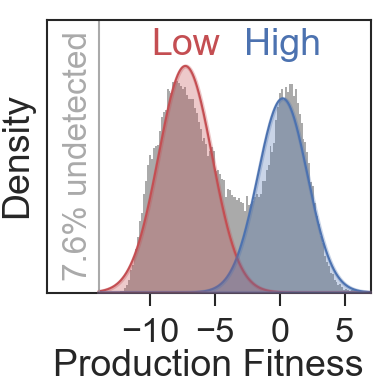

In [10]:
# Figure 

# Figure specifications 
bin_width = 0.15
bins = np.arange(-200, 200, bin_width)

sns.set_theme(style='ticks', font_scale=0.75, rc={
    'svg.fonttype': 'none',
    'font.sans-serif': ['Arial'],
    'font.family': 'sans-serif',
    'text.usetex': False,
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.size': 9,
    'axes.labelsize': 9,
    'axes.titlesize': 9,
    'lines.linewidth': 0.5,
    'axes.linewidth': 0.5,
    'legend.fontsize': 9,
    'legend.title_fontsize': 9,
    'xtick.major.size': 3,
    'xtick.major.pad': 3,
    'xtick.major.width': 0.5,
    'ytick.major.size': 3,
    'ytick.major.pad': 3,
    'ytick.major.width': 0.5,
})
fig = plt.figure(figsize=(1.3, 1.3), dpi=300)
gs = fig.add_gridspec(
    1, 1,
    wspace=0, hspace=0,
    left=0.12, right=0.95, bottom=0.25, top=0.95
)


ax = fig.add_subplot(gs[0, 0])
ax.hist(valid_x, bins=bins, linewidth=0, density=True, color='#AAA')

# Distributions
xs = np.linspace(-14, 7, 1000)
lo_n = 35_776
hi_n = 28_400
sum_n = lo_n + hi_n
lo_y = norm.pdf(xs, loc=-7.3, scale=np.sqrt(4.25)) * (lo_n / sum_n)
hi_y = norm.pdf(xs, loc=0.22, scale=np.sqrt(3.65)) * (hi_n / sum_n)


ax.plot(xs, lo_y, '-r', linewidth=0.5, label='Low')
ax.fill_between(
    xs, 
    np.zeros(len(xs)), 
    y2=lo_y, 
    zorder=len(xs)+1, 
    color='r',
    alpha=0.3
)

ax.plot(xs, hi_y, '-b', linewidth=0.5, label='High')
ax.fill_between(
    xs, 
    np.zeros(len(xs)), 
    y2=hi_y, 
    zorder=len(xs)+1, 
    color='b',
    alpha=0.3
)

# Labeling 
ax.set_xlim([-18, 7])
ax.set_xticks([-10, -5, 0, 5])
ax.set_ylim([0, 0.13])
ax.set_yticks([])

ax.set_xlabel('Production Fitness', labelpad=0)
ax.set_ylabel('Density', labelpad=3)


ax.text(-7.3, 0.97, 'Low', transform=mpl.transforms.blended_transform_factory(ax.transData, ax.transAxes), 
        ha='center', va='top', color='r', fontsize=9)
ax.text(0.22, 0.97, 'High', transform=mpl.transforms.blended_transform_factory(ax.transData, ax.transAxes), 
        ha='center', va='top', color='b', fontsize=9)

ax.axvline(-14, linewidth=0.5, linestyle='-', color='#AAA')
ax.text(
    0.05, 0.5, '{:.1%} undetected'.format(n_invalid_x / len(df2b)),
    ha='left', va='center', color='#AAA', transform=ax.transAxes,
    rotation=90, fontsize=8
)


# Save Figure and display 
filename = 'figures/fig2b_production_fitness_space'
fig.savefig('{}.png'.format(filename), dpi=300)
fig.savefig('{}_600dpi.svg'.format(filename), dpi=600)
fig.savefig('{}_1200dpi.svg'.format(filename), dpi=1200)

plt.close()

Image(filename + '.png')

-----

# NNK fit sequence space is biased compared to production-fit space 




In [11]:
# Data

# NNK 
nnk = pd.read_csv('data/nnk_library_top_production_fitness_75k.csv')

# Designed 
modeling = pd.read_csv('data/modeling_library_production_fitness.csv')


In [12]:
# Preprocessing 

# Slicing out high production fit variants 
high_fit = modeling[(np.log2(modeling.Production) > -2)] 
high_fit = high_fit.reset_index(drop = True)


/Users/slou/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [16]:
high_fit

,AA,CodonRep1,CodonRep2,Label,Production1,Production2,Production
0,AAAFQEE,GCGGCTGCTTTTCAGGAGGAA,GCAGCCGCCTTCCAAGAAGAG,Designed,1.619001,1.901295,1.760148
1,AAALKGI,GCGGCCGCATTAAAGGGAATA,GCCGCAGCGTTGAAAGGGATC,Designed,2.017490,0.698961,1.358226
2,AAASQPM,GCCGCAGCGAGCCAACCCATG,GCAGCGGCTTCACAGCCAATG,Calibration,1.167695,4.432155,2.799925
3,AADGMGV,GCAGCAGACGGTATGGGCGTA,GCTGCGGATGGGATGGGGGTT,Designed,1.031837,1.484053,1.257945
4,AADGVSM,GCAGCGGACGGTGTCTCTATG,GCTGCCGATGGCGTTAGTATG,Designed,6.174702,2.409631,4.292166
...,...,...,...,...,...,...,...
26225,YYSIQQE,TACTACTCGATCCAACAAGAA,TATTATAGTATTCAGCAGGAG,Designed,1.828647,1.338640,1.583643
26226,YYTATNP,TACTACACAGCCACTAATCCG,TATTATACGGCGACCAACCCT,Designed,5.663701,4.322407,4.993054
26227,YYTDQTE,TACTATACCGATCAAACTGAG,TATTACACTGACCAGACCGAA,Designed,5.322151,1.731431,3.526791
26228,YYTIKES,TATTATACCATTAAGGAAAGC,TACTACACTATCAAAGAGTCA,Designed,1.650950,1.951781,1.801365


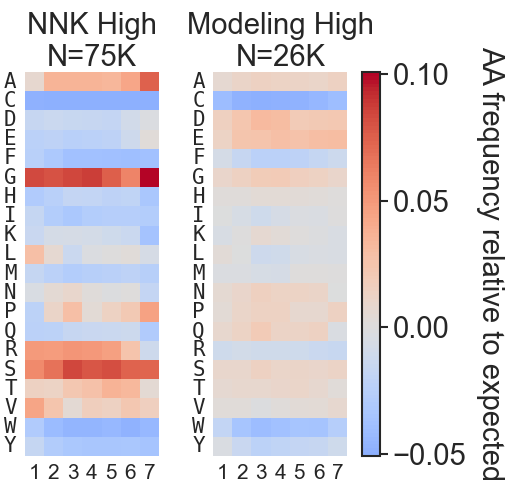

In [13]:
# Figure 

# Configurations
cmap = mpl.cm.coolwarm
vmin = -0.1
vmax = 0.1

sns.set_theme(style='white', font_scale=0.75, rc={
    'svg.fonttype': 'none',
    'font.sans-serif': ['Arial'],
    'font.family': 'sans-serif',
    'text.usetex': False,
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.size': 7,
    'axes.labelsize': 7,
    'axes.titlesize': 7,
    'lines.linewidth': 0.5,
    'axes.linewidth': 0.5,
    'legend.fontsize': 9,
    'legend.title_fontsize': 9,
    'xtick.major.size': 3,
    'xtick.major.pad': 3,
    'xtick.major.width': 0.5,
    'ytick.major.size': 3,
    'ytick.major.pad': 3,
    'ytick.major.width': 0.5,
})

fig = plt.figure(figsize=(1.7, 1.6), dpi=300)
gs = fig.add_gridspec(
    1, 2,
    hspace=0., wspace=0.15,
    left=0.02, right=0.71, bottom=0.05, top=0.85,
    width_ratios=[1, 1]
)
gs2 = fig.add_gridspec(
    1, 1,
    left=0.71, right=0.745, bottom=0.05, top=0.85,
)


# Plot heatmaps 
ax = fig.add_subplot(gs[:, 0])
hm1 = heatmap(nnk['AA'], ax, 'NNK High\nN=75K','results/nnk_high_75k_heatmap.csv', vmin, cmap, vmax)

ax = fig.add_subplot(gs[:, 1])
hm2 = heatmap(high_fit['AA'], ax, 'Modeling High\nN=26K','results/modeling_high_26k_heatmap.csv',vmin, cmap, vmax)


# Colorbar
ax = fig.add_subplot(gs2[0, 0])
colornorm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cb1 = mpl.colorbar.ColorbarBase(
    ax, 
    cmap=cmap, norm=colornorm,
    values=np.linspace(-0.05, 0.1, 100),
    orientation='vertical'
)
cb1.set_label(
    'AA frequency relative to expected', 
    rotation=-90, labelpad=9, fontsize=7
)
ax.yaxis.set_ticks_position('right')
ax.yaxis.set_label_position('right')
    
ax.tick_params(axis='y', length=2, pad=1, labelsize=7)

# Save Figure and display
filename = 'figures/fig2c_production_fitness_space_aa_distribution'
fig.savefig('{}.png'.format(filename))
fig.savefig('{}_600dpi.svg'.format(filename),dpi=600)
fig.savefig('{}_1200dpi.svg'.format(filename),dpi=1200)

plt.close()

Image(filename + '.png')




this indicates taht NNK has bias in its production from manufacturer, while this bias does not translate into high production fitness when producing AAV viruses, production really hates C, also low with W, but the lab prefers W over C, since C will lead to sticky virus and become big virus particles

-----

# Production fitness is replicable across libraries 


Production fitness replication quality of the control set (10K) that is shared between the modeling and assessment libraries.

In [17]:
# Data 

# Load variants of the Modeling and Assess libraries
modeling = pd.read_csv('data/modeling_library_production_fitness.csv')
assess = pd.read_csv('data/assessment_library_production_fitness.csv')


In [18]:
# Preprocessing

# Log2 Enrichment
modeling['log2Enr'] = np.log2(modeling['Production'])
assess['log2Enr'] = np.log2(assess['Production'])

# Shared variants between the two libraries 
df2d = (
    modeling
    .set_index('AA')
    [['log2Enr']]
    .rename(columns={'log2Enr': 'modeling'})
    .join(
        assess
        .set_index('AA')
        [['log2Enr']]
        .rename(columns={'log2Enr': 'assessment'}),
        how='inner'
    )
)

# Non-detected in DNA (NAs)
df2d = df2d.loc[(~df2d['modeling'].isna()) & (~df2d['assessment'].isna()), :]

df2d.head()


# Non-detected in virus (Infs) 
x = df2d['modeling']
y = df2d['assessment']

remove = np.isinf(x) & np.isinf(y)
x = x[~remove]
y = y[~remove]

keep = (~np.isinf(x)) & (~np.isinf(y))
x_both = x[keep]
y_both = y[keep]

y_missing = y[np.isinf(x)]
x_missing = x[np.isinf(y)]

/Users/slou/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/slou/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [19]:
# Correlation between production fitness measurements in the two libraries 
np.corrcoef(x_both, y_both)

array([[1.        , 0.92575639],
       [0.92575639, 1.        ]])

In [ ]:
x_both.shape

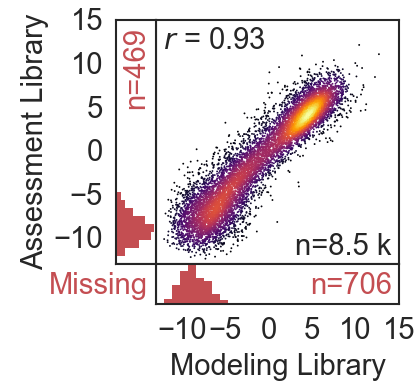

In [20]:
# Figure

# Plotting kernel
kernel = gaussian_kde(np.vstack([x_both.values, y_both.values]))
c_both = kernel(np.vstack([x_both.values, y_both.values]))

# Figure specifications 
fig = plt.figure(figsize=(1.4,1.3), dpi=150)

gs = fig.add_gridspec(2, 2, left=0.275, right=0.95, bottom=0.22, top=0.95, 
                      width_ratios=[1, 6], height_ratios=[6, 1], hspace=0., wspace=0)
ax = fig.add_subplot(gs[0, 1])
# ax.set_aspect('equal', 'box')
ax.scatter(x_both, y_both, c=c_both, cmap=mpl.cm.inferno, s=0.2, edgecolor='none', rasterized=True)
ax.set_xticks([]); ax.set_yticks([])
xlim = [-13, 9]
bins = np.linspace(*xlim, 25)
ax.set_xlim(xlim); ax.set_ylim(xlim)
# ax.set_title('Fc-Ly6A')
ax.text(0.03, 0.97, r'$r$ = {:.2f}'.format(np.corrcoef(x_both, y_both)[0, 1]),
       transform=ax.transAxes, ha='left', va='top', fontsize=7)

ax.text(0.97, 0.01, 'n={}'.format(si_format(len(x_both)), precision=2, format_str='{value}{prefix}',), 
        transform=ax.transAxes, ha='right', va='bottom', fontsize=7)

# Left Marginal
ax = fig.add_subplot(gs[0, 0])
ax.hist(y_missing, bins=bins, edgecolor='none', orientation='horizontal', density=True, color='r')
ax.set_ylim(xlim)
ax.set_xticks([]); ax.set_yticks([-10, -5, 0, 5, 10, 15])
ax.text(0.5, 0.97, 'n={}'.format(len(y_missing)), 
        transform=ax.transAxes, ha='center', va='top', fontsize=7, rotation=90, color='r')
ax.set_ylabel('Assessment Library', labelpad=1)
ax.tick_params(axis='both', labelsize=7, length=2, pad=1)

# Bottom Marginal
ax = fig.add_subplot(gs[1, 1])
ax.hist(x_missing, bins=bins, edgecolor='none', density=True, color='r')
ax.set_xlim(xlim)
ax.set_xticks([-10, -5, 0, 5, 10, 15]); ax.set_yticks([])
ax.text(0.97, 0.8, 'n={}'.format(len(x_missing)), 
        transform=ax.transAxes, ha='right', va='top', fontsize=7, color='r')
ax.set_xlabel('Modeling Library', labelpad=2)
ax.tick_params(axis='both', labelsize=7, length=2, pad=1)

# Missing label
ax = fig.add_subplot(gs[1, 0])
for spine in ['bottom', 'left']:
    ax.spines[spine].set_visible(False)
ax.set_xticks([]); ax.set_yticks([])

ax.text(0.8, 0.8, 'Missing', transform=ax.transAxes, color='r', ha='right', va='top', fontsize=7, clip_on=False)

# Save and display figure 
filename = 'figures/fig2d_production_fitness_replicability'
fig.savefig('{}.png'.format(filename), dpi=300)
fig.savefig('{}_600dpi.svg'.format(filename), dpi=600)
fig.savefig('{}_1200dpi.svg'.format(filename), dpi=1200)

plt.close()

Image(filename+'.png') 